In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0-dlenv_tfe
tensorboard2.1.1
seaborn0.10.0
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5720930461330847293,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8377040326098264137
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 986126088394109897
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14445006029
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3750426796490842475
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
data_dir="../input/kaggle-catsdogs"
test_path= os.path.join(data_dir, 'test')

os.listdir(test_path)

['dogs', 'cats']

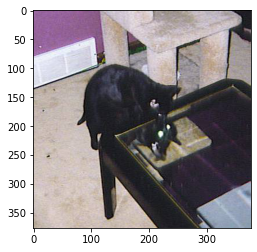

In [16]:
cat_image = test_path + '/cats/' + os.listdir(test_path + '/cats')[6]
imread(cat_image).shape
plt.imshow(imread(cat_image))

In [4]:
image_shape =(300, 300, 3)
test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary',  shuffle=False)
test_image_gen.class_indices

Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [5]:
# help(test_gen.flow_from_directory)

In [6]:
model =tf.keras.models.load_model('catsdogs')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
[0.6773739126205445, 0.5982092266082764, 0.5369308289051056, 0.49721043915748603, 0.4673807229995727, 0.4427423375368118, 0.4242748087644577, 0.4062017357826233, 0.39387915852069855, 0.3811830951452255, 0.3734685912847519, 0.3609814774274826, 0.3533108571529389, 0.3432192801713944, 0.3349912717819214, 0.33089332101345065, 0.32143005023002624, 0.3165169503569603, 0.3075870411396027, 0.3033384872913361, 0.2995713583230972, 0.290740448653698, 0.27978656511306765, 0.2746343347549439, 0.27728338783979417, 0.27028172906637193, 0.2681638311862945, 0.2575760325670242, 0.2515538825392723, 0.24919516099095346, 0.24701100215911864, 0.2390991036534309, 0.24111159519553185, 0.2316838778913021, 0.2339426237344742, 0.2244129252314568, 0.22179310542941091, 0.21844381147623065, 0.21558514132499693, 0.21113117790818212, 0.206767913126

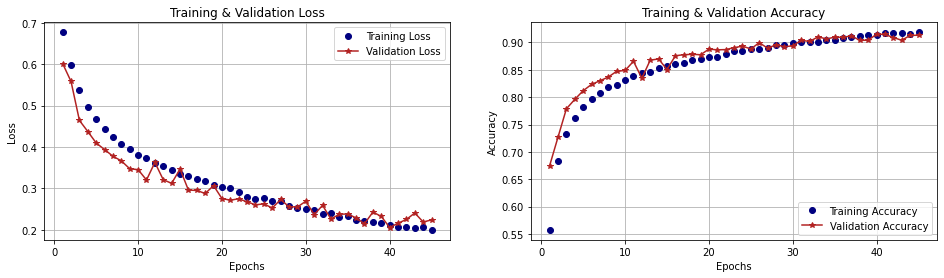

In [7]:
history = pd.read_csv("history_catsdogs.csv")
history_dict = history.to_dict('list')
kr.show_plots(history_dict)

In [8]:
pred = model.predict(test_image_gen)

In [9]:
predictions = pred > 0.5
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions, target_names=test_image_gen.class_indices))

              precision    recall  f1-score   support

        cats       0.93      0.90      0.91      2500
        dogs       0.90      0.93      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [10]:
pred

array([[1.9731293e-04],
       [2.0525556e-03],
       [1.6592268e-02],
       ...,
       [9.0971059e-01],
       [9.9999988e-01],
       [8.4369916e-01]], dtype=float32)

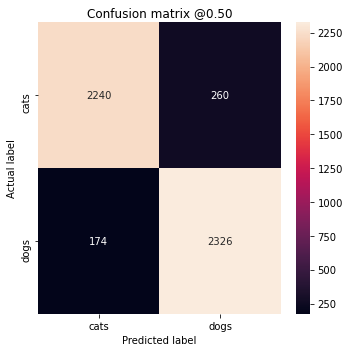

In [11]:

kr.plot_cm(test_image_gen.classes, predictions, test_image_gen.class_indices, 0.5)

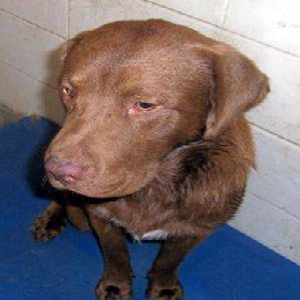

In [12]:
from tensorflow.keras.preprocessing import image
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[5]
# plt.imshow(imread(dog_image))
my_image = image.load_img(dog_image_path, target_size=image_shape)
my_image

In [13]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

(1, 300, 300, 3)

In [20]:
model.predict(my_img_arr)

array([[1.]], dtype=float32)

In [26]:
model.input.shape

TensorShape([None, 300, 300, 3])

In [41]:
from keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(input=model.input, output=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im1.reshape(1,28,28,1))

# activation of the 1st convolution layer
first_layer_activation = activations[0]

# display the 4th channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


TypeError: object of type 'InputLayer' has no len()

In [25]:
help(models.Model)

Help on class Model in module tensorflow.python.keras.engine.training:

class Model(tensorflow.python.keras.engine.network.Network)
 |  Model(*args, **kwargs)
 |  
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
 |  model = tf.keras.Model(inputs=inputs, outputs=outputs)
 |  ```
 |  
 |  2 - By subclassing the `Model` class: in that case, you should define your
 |  layers in `__init__` and you should implement the model's forward pass
 |  in `call`.
 |  
 |  ```python
 |  import tensorflow a